### import library

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('Housing.csv')
print(data.head(10))

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

### Check for null & missing values

In [62]:
null_values=data.isnull()
# percent of null values in house pricing dataset 
# avrage = sum / len(data)
# percent = avrage * 100
# in each colunm
percent_null = data.isnull().sum() * 100 / len(data)
print(percent_null)


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


In [63]:
# in each row 
percent_null = data.isnull().sum(axis=1) * 100 / len(data)
print(percent_null)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
540    0.0
541    0.0
542    0.0
543    0.0
544    0.0
Length: 545, dtype: float64


In [64]:
y_train=data.pop('price')
print(y_train)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [65]:
X=data
print(X)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [66]:
x=np.array(data)
print(x)

[[7420 4 2 ... 2 'yes' 'furnished']
 [8960 4 4 ... 3 'no' 'furnished']
 [9960 3 2 ... 2 'yes' 'semi-furnished']
 ...
 [3620 2 1 ... 0 'no' 'unfurnished']
 [2910 3 1 ... 0 'no' 'furnished']
 [3850 3 1 ... 0 'no' 'unfurnished']]


In [67]:
x_train=x[:,0:4]
print(x_train)

[[7420 4 2 3]
 [8960 4 4 4]
 [9960 3 2 2]
 ...
 [3620 2 1 1]
 [2910 3 1 1]
 [3850 3 1 2]]


In [68]:
x_feature=['area','bedrooms','bathrooms','stories']

### plot x_train with y_train 
- each feature with y_train

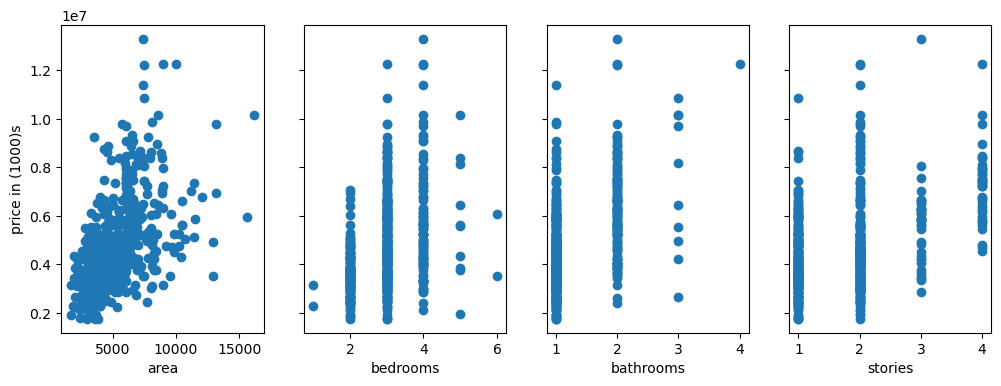

In [69]:
fig,ax=plt.subplots(1,4,figsize=(12,4),sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_feature[i])
    
ax[0].set_ylabel("price in (1000)s")
plt.show()

In [70]:
print(y_train)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


### Feature scaling 
- zero_normalize_feature

In [76]:
def zero_normalize_feature(x):
    # find the mean for each column
    mu=np.mean(x,axis=0)
    # find the standared deviation for each column
    sigma=np.std(x,axis=0,dtype=float)  # axis= 0 --> calcualte mean for each column
    
    # normalization form (rescaling)
    x_norm = (x - mu)/sigma
    
    return (x_norm,mu,sigma) 

In [78]:
x_norm,mu,sigma = zero_normalize_feature(x_train)
print(x_norm)
# mu=np.mean(x_train,axis=0)
# sigma=np.std(x_train,axis=0,dtype=float)
# print(mu)
# print(sigma)

[[1.0467262882352133 1.4034193573588296 1.4218117367065486
  1.3782169202337835]
 [1.7570095257333957 1.4034193573588296 5.405808633904846
  2.53202371213457]
 [2.218232407225722 0.04727831168407383 1.4218117367065486
  0.22441012833299692]
 ...
 [-0.7059206614356268 -1.3088627339906818 -0.5701867118926005
  -0.9293966635677897]
 [-1.0333889072951785 0.04727831168407383 -0.5701867118926005
  -0.9293966635677897]
 [-0.5998393986923918 0.04727831168407383 -0.5701867118926005
  0.22441012833299692]]
